In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install tensorflow keras numpy matplotlib pandas sklearn Bio

In [0]:
#import the libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re, ast
import keras
np.random.seed(1000)
from keras.optimizers import SGD
from keras.layers import BatchNormalization

Using TensorFlow backend.


Class 0: 3498
Class 1: 590
Proportion: 5.93 : 1


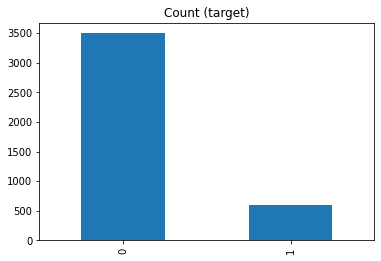

In [0]:

df_train=pd.read_csv('/content/drive/My Drive/Colab_Notebooks/train_Binary_Encoding.csv')
target_count = df_train.Glutarylation.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [0]:
# Class count
train_count_class_0, train_count_class_1 = df_train.Glutarylation.value_counts()

# Divide by class
train_class_0 = df_train[df_train.Glutarylation == 0]
train_class_1 = df_train[df_train.Glutarylation == 1]
print(len(train_class_0))

3498


Random over-sampling:
1    3498
0    3498
Name: Glutarylation, dtype: int64


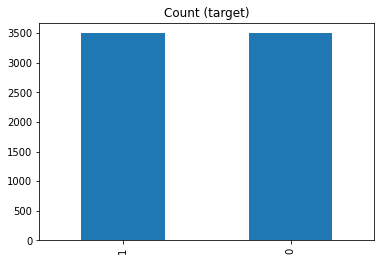

In [0]:

import pandas as pd
train_class_1_over = train_class_1.sample(train_count_class_0, replace=True)
df_train_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Glutarylation.value_counts())

df_train_over.Glutarylation.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
X=df_train_over.Image_Array

In [0]:
print(X[0])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
Y=df_train_over.Glutarylation

In [0]:
print(Y[0])

0


In [0]:
NP_list=[]
y_train=np.array(Y)
print(len(y_train))
y1=np.array(Y)
for i in X:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(len(NP_list[0]))
X_train=np.array(NP_list)
print(len(X_train))
print(X_train[0])

6996
35
6996
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [0]:
# #split data into train and test sets
# X_train,X_val,y_train,y_val=train_test_split(image,level,validation_split=0.2,random_state=20)
print(len(X_train))

6996


In [0]:
#Reshape the data to fit the model
x = X_train.reshape(6996,35,21,1)

 Accuracy :76.57%   Precision :72.79%   Sensitivity :84.86%   ACC :76.57%   MCC :53.89%   AUC :83.43%
 Accuracy :75.71%   Precision :73.44%   Sensitivity :80.57%   ACC :75.71%   MCC :51.67%   AUC :84.22%
 Accuracy :76.29%   Precision :71.70%   Sensitivity :86.86%   ACC :76.29%   MCC :53.79%   AUC :85.63%
 Accuracy :80.00%   Precision :77.63%   Sensitivity :84.29%   ACC :80.00%   MCC :60.22%   AUC :86.50%
 Accuracy :75.14%   Precision :68.33%   Sensitivity :93.71%   ACC :75.14%   MCC :54.16%   AUC :84.79%
 Accuracy :70.71%   Precision :69.23%   Sensitivity :74.57%   ACC :70.71%   MCC :41.55%   AUC :78.22%
 Accuracy :73.39%   Precision :71.73%   Sensitivity :77.08%   ACC :73.39%   MCC :46.92%   AUC :81.46%
 Accuracy :76.68%   Precision :71.43%   Sensitivity :88.83%   ACC :76.68%   MCC :55.03%   AUC :82.27%
 Accuracy :79.97%   Precision :77.78%   Sensitivity :84.00%   ACC :79.97%   MCC :60.13%   AUC :88.25%
 Accuracy :77.11%   Precision :72.62%   Sensitivity :87.14%   ACC :77.11%   MCC :5

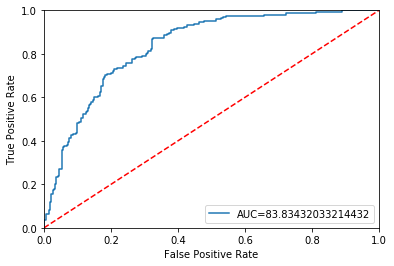

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.optimizers import Adam, SGD
import math
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
accu_lst = []
sen_lst=[]
pre_lst=[]
acc_lst=[]
mcc_lst=[]
auc_lst=[]

for train, test in kfold.split(x, y1):
    y = to_categorical(y1)
    #Build the CNN model
    model = Sequential()
    # add model layers
    # add model layers
    model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same", input_shape=(35,21,1)))
    model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
    model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
    model.add(Dropout(0.4))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
    model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
    model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
    model.add(Dropout(0.4))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    #Compile the model
    opt = Adam(lr=1.0e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # Fit the model
    model.fit(x[train], y[train], epochs=10, verbose=0)
    # evaluate the model
    predictions = model.predict(x[test])
    y_pred=( np.argmax(predictions, axis=1))
    #confution matrix generation
    cm=np.array(confusion_matrix(y1[test],y_pred,labels=[0,1]))
    confusion=pd.DataFrame(cm,index=['not_Glutarylation','Glutarylation'],
                            columns=['predicted_not_Glutarylation','predicted_Glutarylation'])
    
    True_Positive=confusion.at['Glutarylation','predicted_Glutarylation']
    False_Positive=confusion.at['not_Glutarylation','predicted_Glutarylation']
    True_Negative=confusion.at['not_Glutarylation','predicted_not_Glutarylation']
    False_Negative=confusion.at['Glutarylation','predicted_not_Glutarylation']
    
    #Accuracy==>>accuracy = (correctly predicted class / total testing class) × 100%
    # accuracy_score(y_predict, y_test)

    total_testing_class=True_Positive+True_Negative+False_Positive+False_Negative
    correctly_predicted_class=True_Positive + True_Negative
    accuracy = (correctly_predicted_class / total_testing_class) * 100
    
    # Precision = TP / TP + FP
    precision = (True_Positive / (True_Positive + False_Positive))*100
    
    # Sensitivity = TP / TP + FN
    sensitivity = (True_Positive / (True_Positive + False_Negative))*100

    #ACC=TP+TN / TP+FP+TN+FN
    acc = (True_Positive + True_Negative) /(True_Positive+True_Negative+False_Positive+False_Negative) *100
    #MCC = TP*TN - FN*FP / sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN))
    mcc = ((True_Positive * True_Negative) - (False_Positive * False_Negative)) / math.sqrt((True_Positive + False_Negative) * (True_Negative + False_Positive)*(True_Positive + False_Positive)*(True_Negative + False_Negative)) *100
    
    lr_probs = model.predict_proba(x[test])
    lr_probs = lr_probs[:, 1]
    lr_auc = (roc_auc_score(y1[test], lr_probs))*100
        
    print(" Accuracy :%.2f%%   Precision :%.2f%%   Sensitivity :%.2f%%   ACC :%.2f%%   MCC :%.2f%%   AUC :%.2f%%"% (accuracy,precision,sensitivity,acc,mcc,lr_auc))
    accu_lst.append(accuracy)
    sen_lst.append(sensitivity)
    pre_lst.append(precision)
    acc_lst.append(acc)
    mcc_lst.append(mcc)
    auc_lst.append(lr_auc)
print("Accuracy    :%.2f%% (+/- %.2f%%)" % (numpy.mean(accu_lst), numpy.std(accu_lst)))
print("Precision   :%.2f%% (+/- %.2f%%)" % (numpy.mean(pre_lst), numpy.std(pre_lst)))
print("Sensitivity :%.2f%% (+/- %.2f%%)" % (numpy.mean(sen_lst), numpy.std(sen_lst)))
print("ACC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(acc_lst), numpy.std(acc_lst)))
print("MCC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(mcc_lst), numpy.std(mcc_lst)))
print("AUC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(auc_lst), numpy.std(auc_lst)))
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, _ = roc_curve(y1[test], lr_probs)
# plot the roc curve for the model
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.plot(fpr,tpr,label="AUC="+str(numpy.mean(auc_lst)))
# show the legend
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.legend()
# show the plot
pyplot.show()
  
